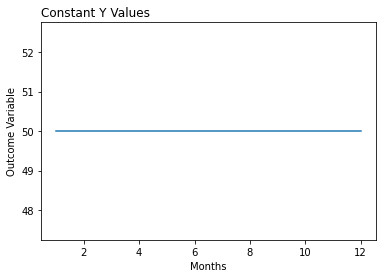

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# Khai báo trục tháng
month = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
# Khai báo trục thông tin số người chết
# Lưu ý: mỗi mảng sẽ vẽ 1 đường
nod = np.array([50,50,50,50,50,50,50,50,50,50,50,50])

plt.plot(month, nod, label='B')
plt.title("Constant Y Values",loc = 'left')
plt.xlabel("Months")
plt.ylabel("Outcome Variable")

plt.show()

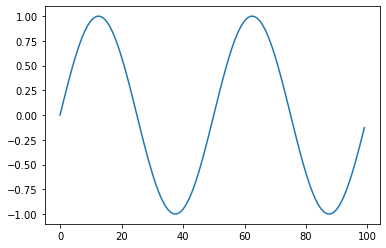

In [27]:
import matplotlib.pyplot as plt # For ploting
import numpy as np # to work with numerical data efficiently

fs = 100 # sample rate 
f = 2 # the frequency of the signal
x = np.arange(fs)
y = np.sin(2*np.pi*f * (x/fs))
plt.plot(x,y)
plt.show()

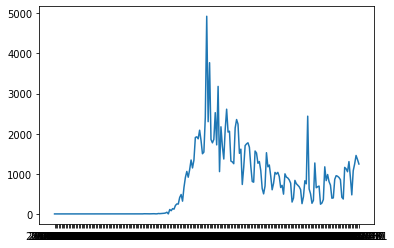

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
# Load dữ liệu
data = pd.read_csv('owid-covid-data.csv')
# Lấy dữ liệu của nước Mỹ và lấy cột ngày và cột số người chết.
df = data[data.location=='United States'].loc[:, ['date','new_deaths']]
# Thay đổi giá trị dữ liệu cho phù hợp
df.index = pd.DatetimeIndex(df['date'],dtype='datetime64[ns]', freq='D')
#df.dtypes
plt.plot(df.date,df.new_deaths)
plt.show()

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load dữ liệu
data = pd.read_csv('owid-covid-data.csv')
# Hiển thị các cột có trong dữ liệu
data.columns
# Lấy ra dữ liệu của nước Mỹ
df=data[data.location=='United States']
'''
Augmented Dickey-Fuller test
Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
Below is an example of calculating the Augmented Dickey-Fuller test on the Daily Female Births dataset. The statsmodels library provides the adfuller() function that implements the test.
'''
X = np.diff(df.new_deaths.to_numpy())
Y = df.date.to_numpy()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
Y = Y[:-1].copy()
print(len(Y))
print(len(X))
plt.plot(Y,X)
plt.show()

ADF Statistic: -4.320557
p-value: 0.000409
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
214
214


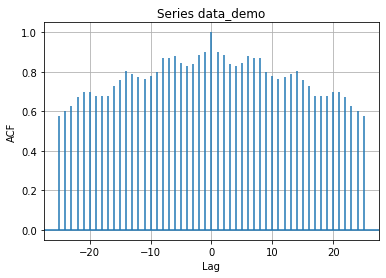

In [66]:
# We use the Auto Correlation Graph

# First we have a look at our acf graph when our data isn't stationary.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load dữ liệu
data = pd.read_csv('owid-covid-data.csv')
# Hiển thị các cột có trong dữ liệu
data.columns
# Lấy ra dữ liệu của nước Mỹ
df=data[data.location=='United States']

# Adding plot title.
plt.title("Series data_demo")
 
# Providing x-axis name.
plt.ylabel("ACF")
plt.xlabel("Lag")
# Plotting the Autocorrelation plot.
plt.acorr(df.new_deaths, maxlags = 25)
 
# Displaying the plot.
plt.grid(True) 
plt.show()


In [67]:
# To select the p and q values we select the number before the first inverted line.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load dữ liệu
data = pd.read_csv('owid-covid-data.csv')
# Hiển thị các cột có trong dữ liệu
data.columns
# Lấy ra dữ liệu của nước Mỹ
df=data[data.location=='United States']

# Adding plot title.
plt.title("Series data_demo")
 
# Providing x-axis name.
plt.ylabel("ACF")
plt.xlabel("Lag")
# Make the data stationary, by differencing the data.
X = np.diff(df.new_deaths.to_numpy())
# Plotting the Autocorrelation plot.

plt.acorr(X, maxlags = 25)
 
# Displaying the plot.
plt.grid(True) 
plt.show()

            new_deaths
date                  
2020-07-28      1076.0
2020-07-29      1245.0
2020-07-30      1457.0
2020-07-31      1357.0
2020-08-01      1244.0


c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:>

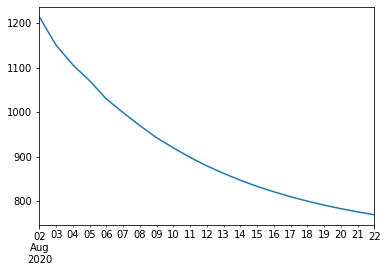

In [137]:
# arima has a auto.arima function which gives us the ideal arima model based on our data.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
# Load dữ liệu
data = pd.read_csv('owid-covid-data.csv')
# Lấy dữ liệu của nước Mỹ và lấy cột ngày và cột số người chết.
df = data[data.location=='United States'].loc[:, ['date','new_deaths']]
# Thay đổi giá trị dữ liệu cho phù hợp
df.index = pd.DatetimeIndex(df['date'],dtype='datetime64[ns]', freq='D')
df = df.loc[:, ['new_deaths']]
print(df.tail())
# fit model
model = ARIMA(df, order=(3,0,2))
model_fit = model.fit()
# summary of fit model
#print(model_fit.summary())
start_index = '2020-08-02'
end_index = '2020-08-22'
forecast = model_fit.predict(start=start_index, end=end_index)
forecast.plot()